In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc
from scipy.fftpack import fft, dct, idct
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

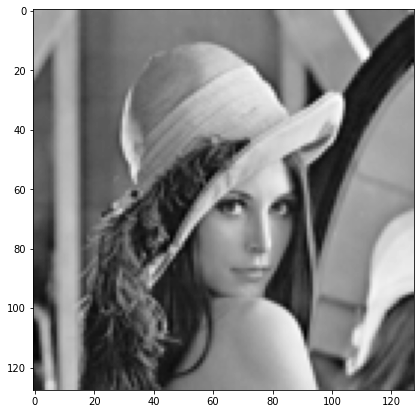

In [77]:
im = plt.imread("./data/lena_tiny.png")
f = plt.figure()
plt.imshow(im,cmap='gray')

In [74]:
def dct2(a):
    res = dct(a.real, axis=0, norm='ortho')
    return dct(res, axis=1, norm='ortho')

def idct2(a):
    res = idct(a, axis=0, norm='ortho')
    return idct(res, axis=1 , norm='ortho')



In [78]:
imsize = im.shape
dct_res = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct_res[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, '8x8 DCTs of the image')

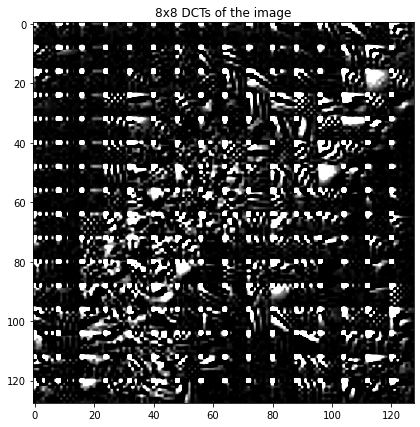

In [79]:
# Display entire DCT
plt.figure()
plt.imshow(dct_res, cmap='gray', vmax = np.max(dct_res) * 0.01, vmin = 0)
plt.title("8x8 DCTs of the image")

Keeping only 45.880127% of the DCT coefficients


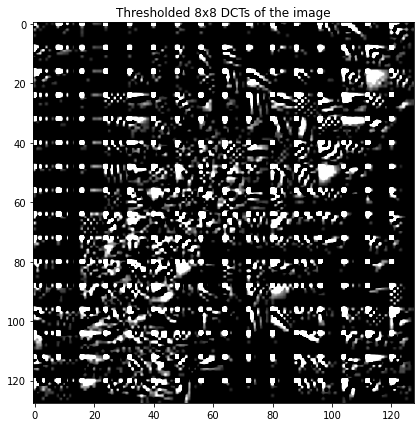

In [80]:
thresh = 0.00165
dct_thresh = dct_res * (abs(dct_res) > (thresh * np.max(dct_res)))

plt.figure()
plt.imshow(dct_thresh, cmap='gray', vmax = np.max(dct_res)*0.01, vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum(dct_thresh != 0.0) / (imsize[0] * imsize[1] * 1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros * 100.0))

In [85]:
import json
import base64

ser = json.dumps({'dct': dct_thresh.tolist()})
print(len(ser))

211788


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

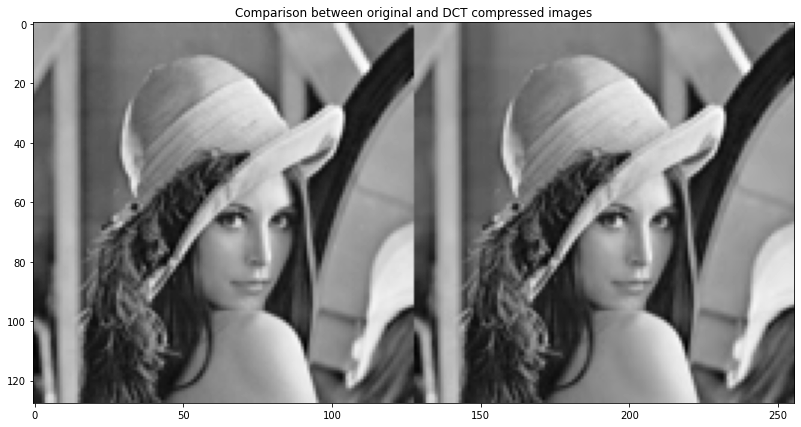

In [86]:
im_dct = np.zeros(imsize)
# dct_rec = np.fromstring(s)
dct_thresh = np.around(dct_thresh, 3)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2(dct_thresh[i:(i+8),j:(j+8)])
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )